# Imports

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


___
# Data exploration

In [303]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df = df.drop(["id"], axis=1)

print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


___
# Data prepocessing

## Transformation data to numerical values

In [304]:
print(df["gender"].value_counts())

gender_type_map = {"Female": 2, "Male": 1, "Other": 0}
df["gender"] = df["gender"].map(gender_type_map)

print(df["gender"].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
2    2994
1    2115
0       1
Name: gender, dtype: int64


In [305]:
print(df["work_type"].value_counts())

work_type_map = {"Private": 4, "Self-employed": 3, "children": 2, "Govt_job": 1, "Never_worked": 0}
df["work_type"] = df["work_type"].map(work_type_map)

print(df["work_type"].value_counts())

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
4    2925
3     819
2     687
1     657
0      22
Name: work_type, dtype: int64


In [306]:
print(df["Residence_type"].value_counts())

residence_type_map = {"Urban":1, "Rural":0}
df["Residence_type"] = df["Residence_type"].map(residence_type_map)

print(df["Residence_type"].value_counts())

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
1    2596
0    2514
Name: Residence_type, dtype: int64


In [307]:
print(df["ever_married"].value_counts())

married_type_map = {"Yes":1, "No":0}
df["ever_married"] = df["ever_married"].map(married_type_map)

print(df["ever_married"].value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64
1    3353
0    1757
Name: ever_married, dtype: int64


In [308]:
print(df["smoking_status"].value_counts())

smoking_type_map = {"smokes": 3, "formerly smoked": 2, "never smoked": 1, "Unknown": 0}
df["smoking_status"] = df["smoking_status"].map(smoking_type_map)

print(df["smoking_status"].value_counts())


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
1    1892
0    1544
2     885
3     789
Name: smoking_status, dtype: int64


## Dropping NaN values

In [309]:
df = df.dropna()

In [310]:
print(df.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          4   
2       1  80.0             0              1             1          4   
3       2  49.0             0              0             1          4   
4       2  79.0             1              0             1          3   
5       1  81.0             0              0             1          4   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               2       1  
2               0             105.92  32.5               1       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               1       1  
5               1             186.21  29.0               2       1  


## Splitting data for training

In [311]:
labels = df["stroke"]
features = df.drop("stroke", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

___
# Model evaluation

## Linear Regression

In [312]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

0.945010183299389
[[927   2]
 [ 52   1]]


/var/home/valentin/.cache/pypoetry/virtualenvs/healthcare-stroke-prediction-fu-Cbw5V-py3.10/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN Classifier

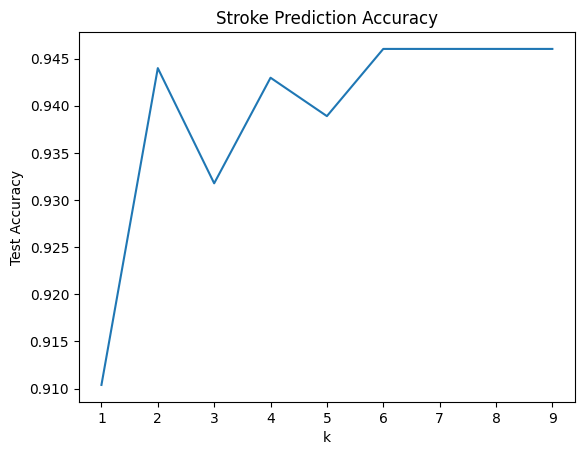

Best score: 0.946 achieved at k=6


In [313]:
k_list = range(1, 10)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)

  classifier.fit(X_train, y_train)

  accuracies.append(classifier.score(X_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Stroke Prediction Accuracy")
plt.show()

k_best_score = np.argmax(accuracies) + 1
best_score = round(np.max(accuracies), 3)

print("Best score: " + str(best_score) + " achieved at k=" + str(k_best_score))